# Business Understanding (Toyota Dataset)

# Latar Belakang :
Toyota adalah salah satu produsen mobil terbesar di dunia. Perusahaan yang bermarkas di Tokyo (Jepang) ini didirikan pada 28 Agustus 1937, 82 tahun lalu. Pendirinya adalah Kiichiro Toyoda, anak tertua dari Sakichi Toyoda sang pencetus industri Toyota yang semula membuat mesin jahit pada awal 1900-an.

Bagi orang Jepang, barangkali nama Sakichi Toyoda layak disejajarkan dengan Thomas Alva Edison. Ia tak hanya mampu mencerahkan industri Jepang, namun juga mempermudah kerja buruh-buruh tenun dengan mesin otomatis yang menambah kapasitas serta efisiensi produksi tekstil kala itu.

Etos kerja terampil dan tak mudah menyerah secara langsung ditularkan kepada Kiichiro Toyoda, yang sejak kecil sudah terbiasa melihat ayahnya bekerja di pabrik. Usai lulus dari universitas, ia pun bergabung dengan perusahaan milik keluarga, Toyoda Automatic Loom Works Ltd yang kemudian menjadi Toyota Industries Corporation.

dataset toyota ini diambil dari website kaggle: https://www.kaggle.com/datasets/nopsam/dataset-toyota

# Mulai Analisis Data Dengan membaca file Toyota

In [1]:
import pandas as pd
data = pd.read_csv('toyota.csv')

# Tampil list 5 data terakhir teratas 
# data.head()

# tampil list 5 data terakhir terbawah
# data.tail()

# Tampil Tipe data dan informasi data Toyota
# data.info()

# Data Preparation - Cek Duplikasi data

In [2]:
data.nunique()

model             18
tahun             23
harga           2114
transmisi          4
jarak_tempuh    5699
tipe_bensin        4
pajak             29
mpg               81
ukuran_mesin      16
dtype: int64

# Data Preparation - Perhitungan Nilai

In [3]:
# Cek isnull
data.isnull()

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,pajak,mpg,ukuran_mesin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6733,False,False,False,False,False,False,False,False,False
6734,False,False,False,False,False,False,False,False,False
6735,False,False,False,False,False,False,False,False,False
6736,False,False,False,False,False,False,False,False,False


In [4]:
# cek isnull dengan sum
data.isnull().sum()

model           0
tahun           0
harga           0
transmisi       0
jarak_tempuh    0
tipe_bensin     0
pajak           0
mpg             0
ukuran_mesin    0
dtype: int64

# Data preparation - Pengurangan Data

In [5]:
# menghapus ukuran_mesin dari data
data = data.drop(['ukuran_mesin'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   tahun         6738 non-null   int64  
 2   harga         6738 non-null   int64  
 3   transmisi     6738 non-null   object 
 4   jarak_tempuh  6738 non-null   int64  
 5   tipe_bensin   6738 non-null   object 
 6   pajak         6738 non-null   int64  
 7   mpg           6738 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 421.3+ KB


# Data Preparation - Menambahkan kolom data baru

In [6]:
# Import library datetime
from datetime import date
# tambah tabel umur mobil
date.today().year
data['Umur_Mobil']=date.today().year-data['tahun']
data.head()

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,pajak,mpg,Umur_Mobil
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,8
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,7
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,9
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,7
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,7


# Data Preparation - Split Data

In [7]:
data['Model_Kendaraan'] = data.model.str.split().str.get(0)
data[['Model_Kendaraan','tipe_bensin','transmisi']].head()

,Model_Kendaraan,tipe_bensin,transmisi
0,GT86,Petrol,Manual
1,GT86,Petrol,Manual
2,GT86,Petrol,Manual
3,GT86,Petrol,Manual
4,GT86,Petrol,Manual


# Data Preparation - Pembersihan Data

In [8]:
print(data.Model_Kendaraan.unique())
print(data.Model_Kendaraan.nunique())

['GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis'
 'Verso' 'Hilux' 'PROACE' 'Land' 'Supra' 'Camry' 'Verso-S' 'IQ' 'Urban']
18


In [9]:
# Mencari data yang terlihat salah

searchfor = ['PROACE', 'VERSO']
data[data.Model_Kendaraan.str.contains('|'.join(searchfor))].head(5)

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,pajak,mpg,Umur_Mobil,Model_Kendaraan
6634,PROACE VERSO,2019,27998,Automatic,5,Diesel,145,38.7,5,PROACE
6635,PROACE VERSO,2019,27998,Automatic,10,Diesel,145,38.7,5,PROACE
6636,PROACE VERSO,2019,27998,Automatic,240,Diesel,145,38.7,5,PROACE
6637,PROACE VERSO,2019,24498,Manual,588,Diesel,145,40.4,5,PROACE
6638,PROACE VERSO,2019,27998,Automatic,50,Diesel,145,38.7,5,PROACE


In [10]:
# cek info data
# data.info()

# Mengganti PROACE VERSO ke nama Model yang benar
data['Model_Kendaraan'].replace({"PROACE" : "Proace"}, inplace=True)

new_data = data[['Model_Kendaraan','tahun','harga','Umur_Mobil']]
new_data[new_data['Model_Kendaraan'].str.contains('Proace')]


,Model_Kendaraan,tahun,harga,Umur_Mobil
6634,Proace,2019,27998,5
6635,Proace,2019,27998,5
6636,Proace,2019,27998,5
6637,Proace,2019,24498,5
6638,Proace,2019,27998,5
6639,Proace,2019,25488,5
6640,Proace,2019,28456,5
6641,Proace,2019,24990,5
6642,Proace,2019,27990,5
6643,Proace,2019,27249,5


# Analisis Data Eksplorasi

In [11]:
# Analsis data
print(data.describe())

             tahun         harga   jarak_tempuh        pajak          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        Umur_Mobil  
count  6738.000000  
mean      7.251855  
std       2.204062  
min       4.000000  
25%       6.000000  
50%       7.000000  
75%       8.000000  
max      26.000000  


In [12]:
# data.describe().T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun,6738.0,2016.748145,2.204062,1998.0,2016.0,2017.0,2018.00,2020.0
harga,6738.0,12522.391066,6345.017587,850.0,8290.0,10795.0,14995.00,59995.0
jarak_tempuh,6738.0,22857.413921,19125.464147,2.0,9446.0,18513.0,31063.75,174419.0
pajak,6738.0,94.697240,73.880776,0.0,0.0,135.0,145.00,565.0
mpg,6738.0,63.042223,15.836710,2.8,55.4,62.8,69.00,235.0
Umur_Mobil,6738.0,7.251855,2.204062,4.0,6.0,7.0,8.00,26.0


In [13]:
# Tampil semua data object include all
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,6738,18,Yaris,2122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,6738.0,NaN,NaN,NaN,2016.748145,2.204062,1998.0,2016.0,2017.0,2018.0,2020.0
harga,6738.0,NaN,NaN,NaN,12522.391066,6345.017587,850.0,8290.0,10795.0,14995.0,59995.0
transmisi,6738,4,Manual,3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jarak_tempuh,6738.0,NaN,NaN,NaN,22857.413921,19125.464147,2.0,9446.0,18513.0,31063.75,174419.0
tipe_bensin,6738,4,Petrol,4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pajak,6738.0,NaN,NaN,NaN,94.69724,73.880776,0.0,0.0,135.0,145.0,565.0
mpg,6738.0,NaN,NaN,NaN,63.042223,15.83671,2.8,55.4,62.8,69.0,235.0
Umur_Mobil,6738.0,NaN,NaN,NaN,7.251855,2.204062,4.0,6.0,7.0,8.0,26.0
Model_Kendaraan,6738,18,Yaris,2122,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ringkasan Statik

### - Tipe Model toyota dirilis dari tahun 1998 sampai tahun 2020
### - Yaris adalah model yang sering dirilis oleh toyota
### - rata-rata jarak tempuh toyota adalah 22k KM, data ini menunjukan minimum adalah 2 KM sampai 174km
### - harga mobil paling murah adalah 850 dollar sedangkan paling mahal adalah 60.000 dollar


In [14]:
# Mengecek Tipe data
data.dtypes

model               object
tahun                int64
harga                int64
transmisi           object
jarak_tempuh         int64
tipe_bensin         object
pajak                int64
mpg                float64
Umur_Mobil           int64
Model_Kendaraan     object
dtype: object

# Jumlah Object adalah: 4
# Jumlah tipe numerik adalah: 6

In [15]:
import numpy as np
# memisahkan tipe data
dataobject = data.select_dtypes(include=['object']).columns
datanumeric = data.select_dtypes(include=np.number).columns.tolist()
print("Kategori Variabel Object:")
print(dataobject)
print("Kategori Variabel Numerik:")
print(datanumeric)

Kategori Variabel Object:
Index(['model', 'transmisi', 'tipe_bensin', 'Model_Kendaraan'], dtype='object')
Kategori Variabel Numerik:
['tahun', 'harga', 'jarak_tempuh', 'pajak', 'mpg', 'Umur_Mobil']


# Visualisasi Data (Histogram dan Boxplot)

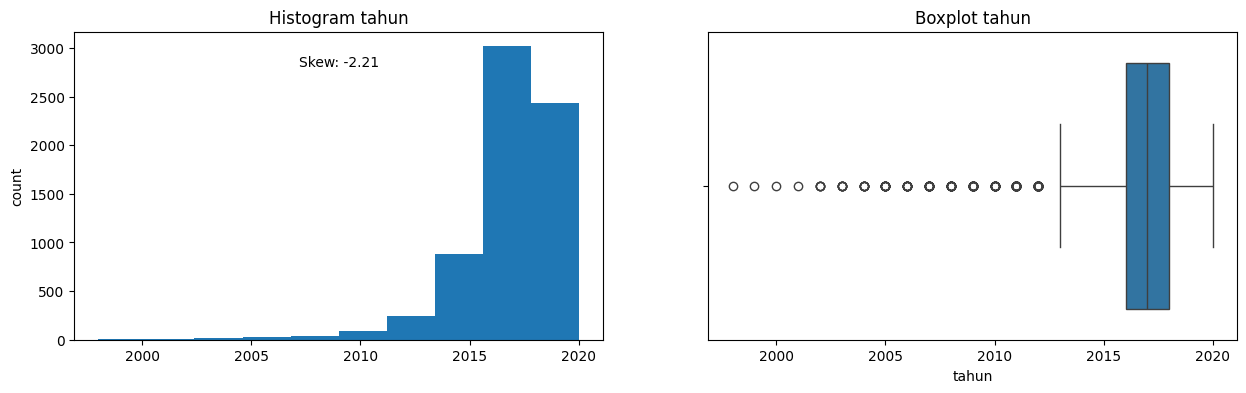

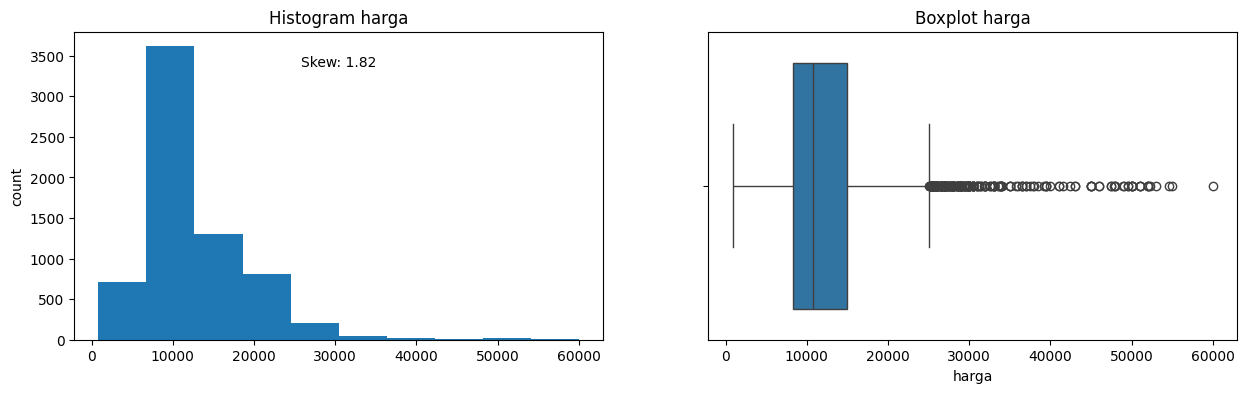

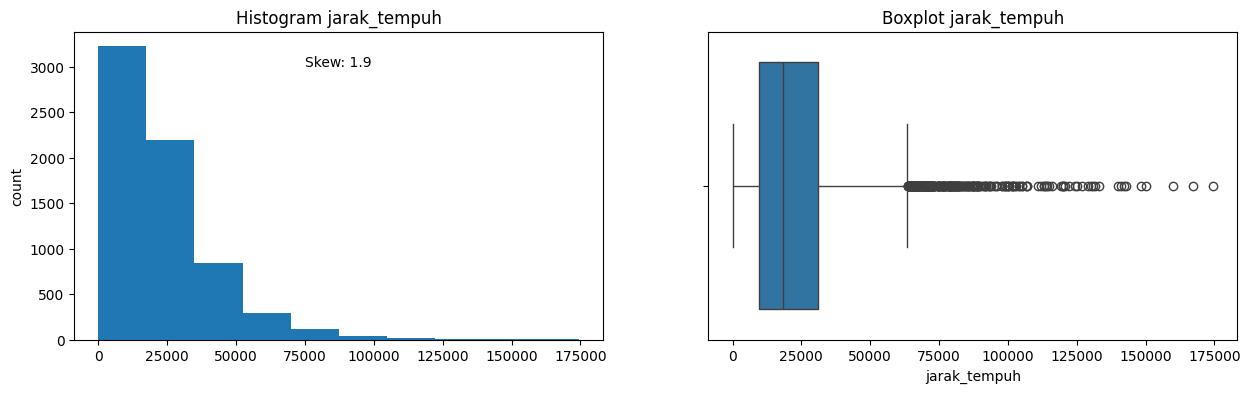

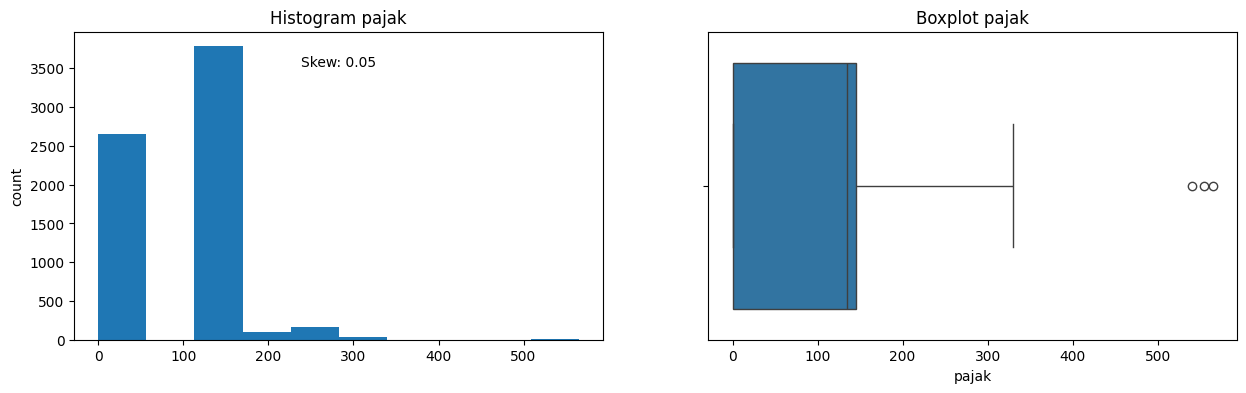

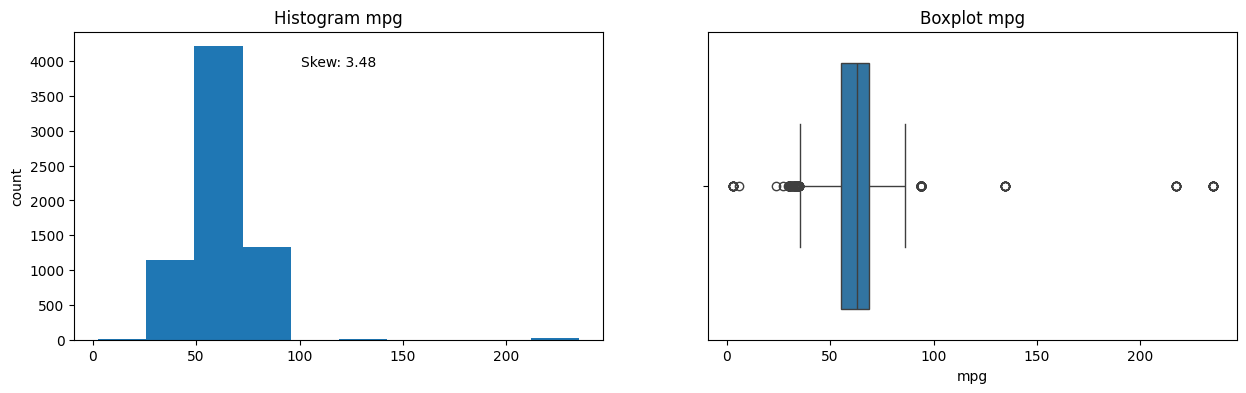

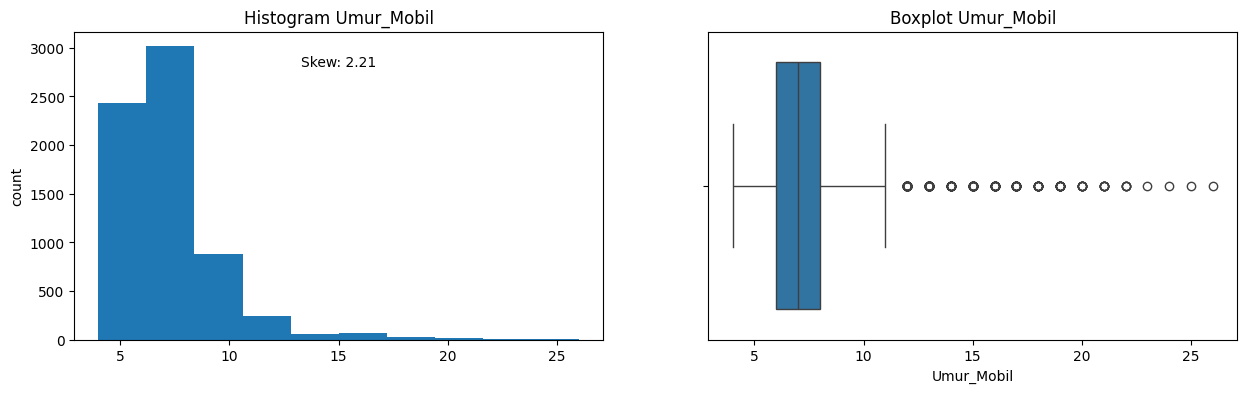

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in datanumeric:
    plt.figure(figsize=(15, 4))
    
    # Plot Histogram
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.title('Histogram ' + col)
    # Hitung dan taruh teks skew di tengah gambar Plot Histogram
    skew_count = round(data[col].skew(), 2)
    plt.text(0.5, 0.9, 'Skew: {}'.format(skew_count),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)

    # Plot Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title("Boxplot " + col)

    # tampil plot
    plt.show()

# Visualisasi Data (Count Plot)

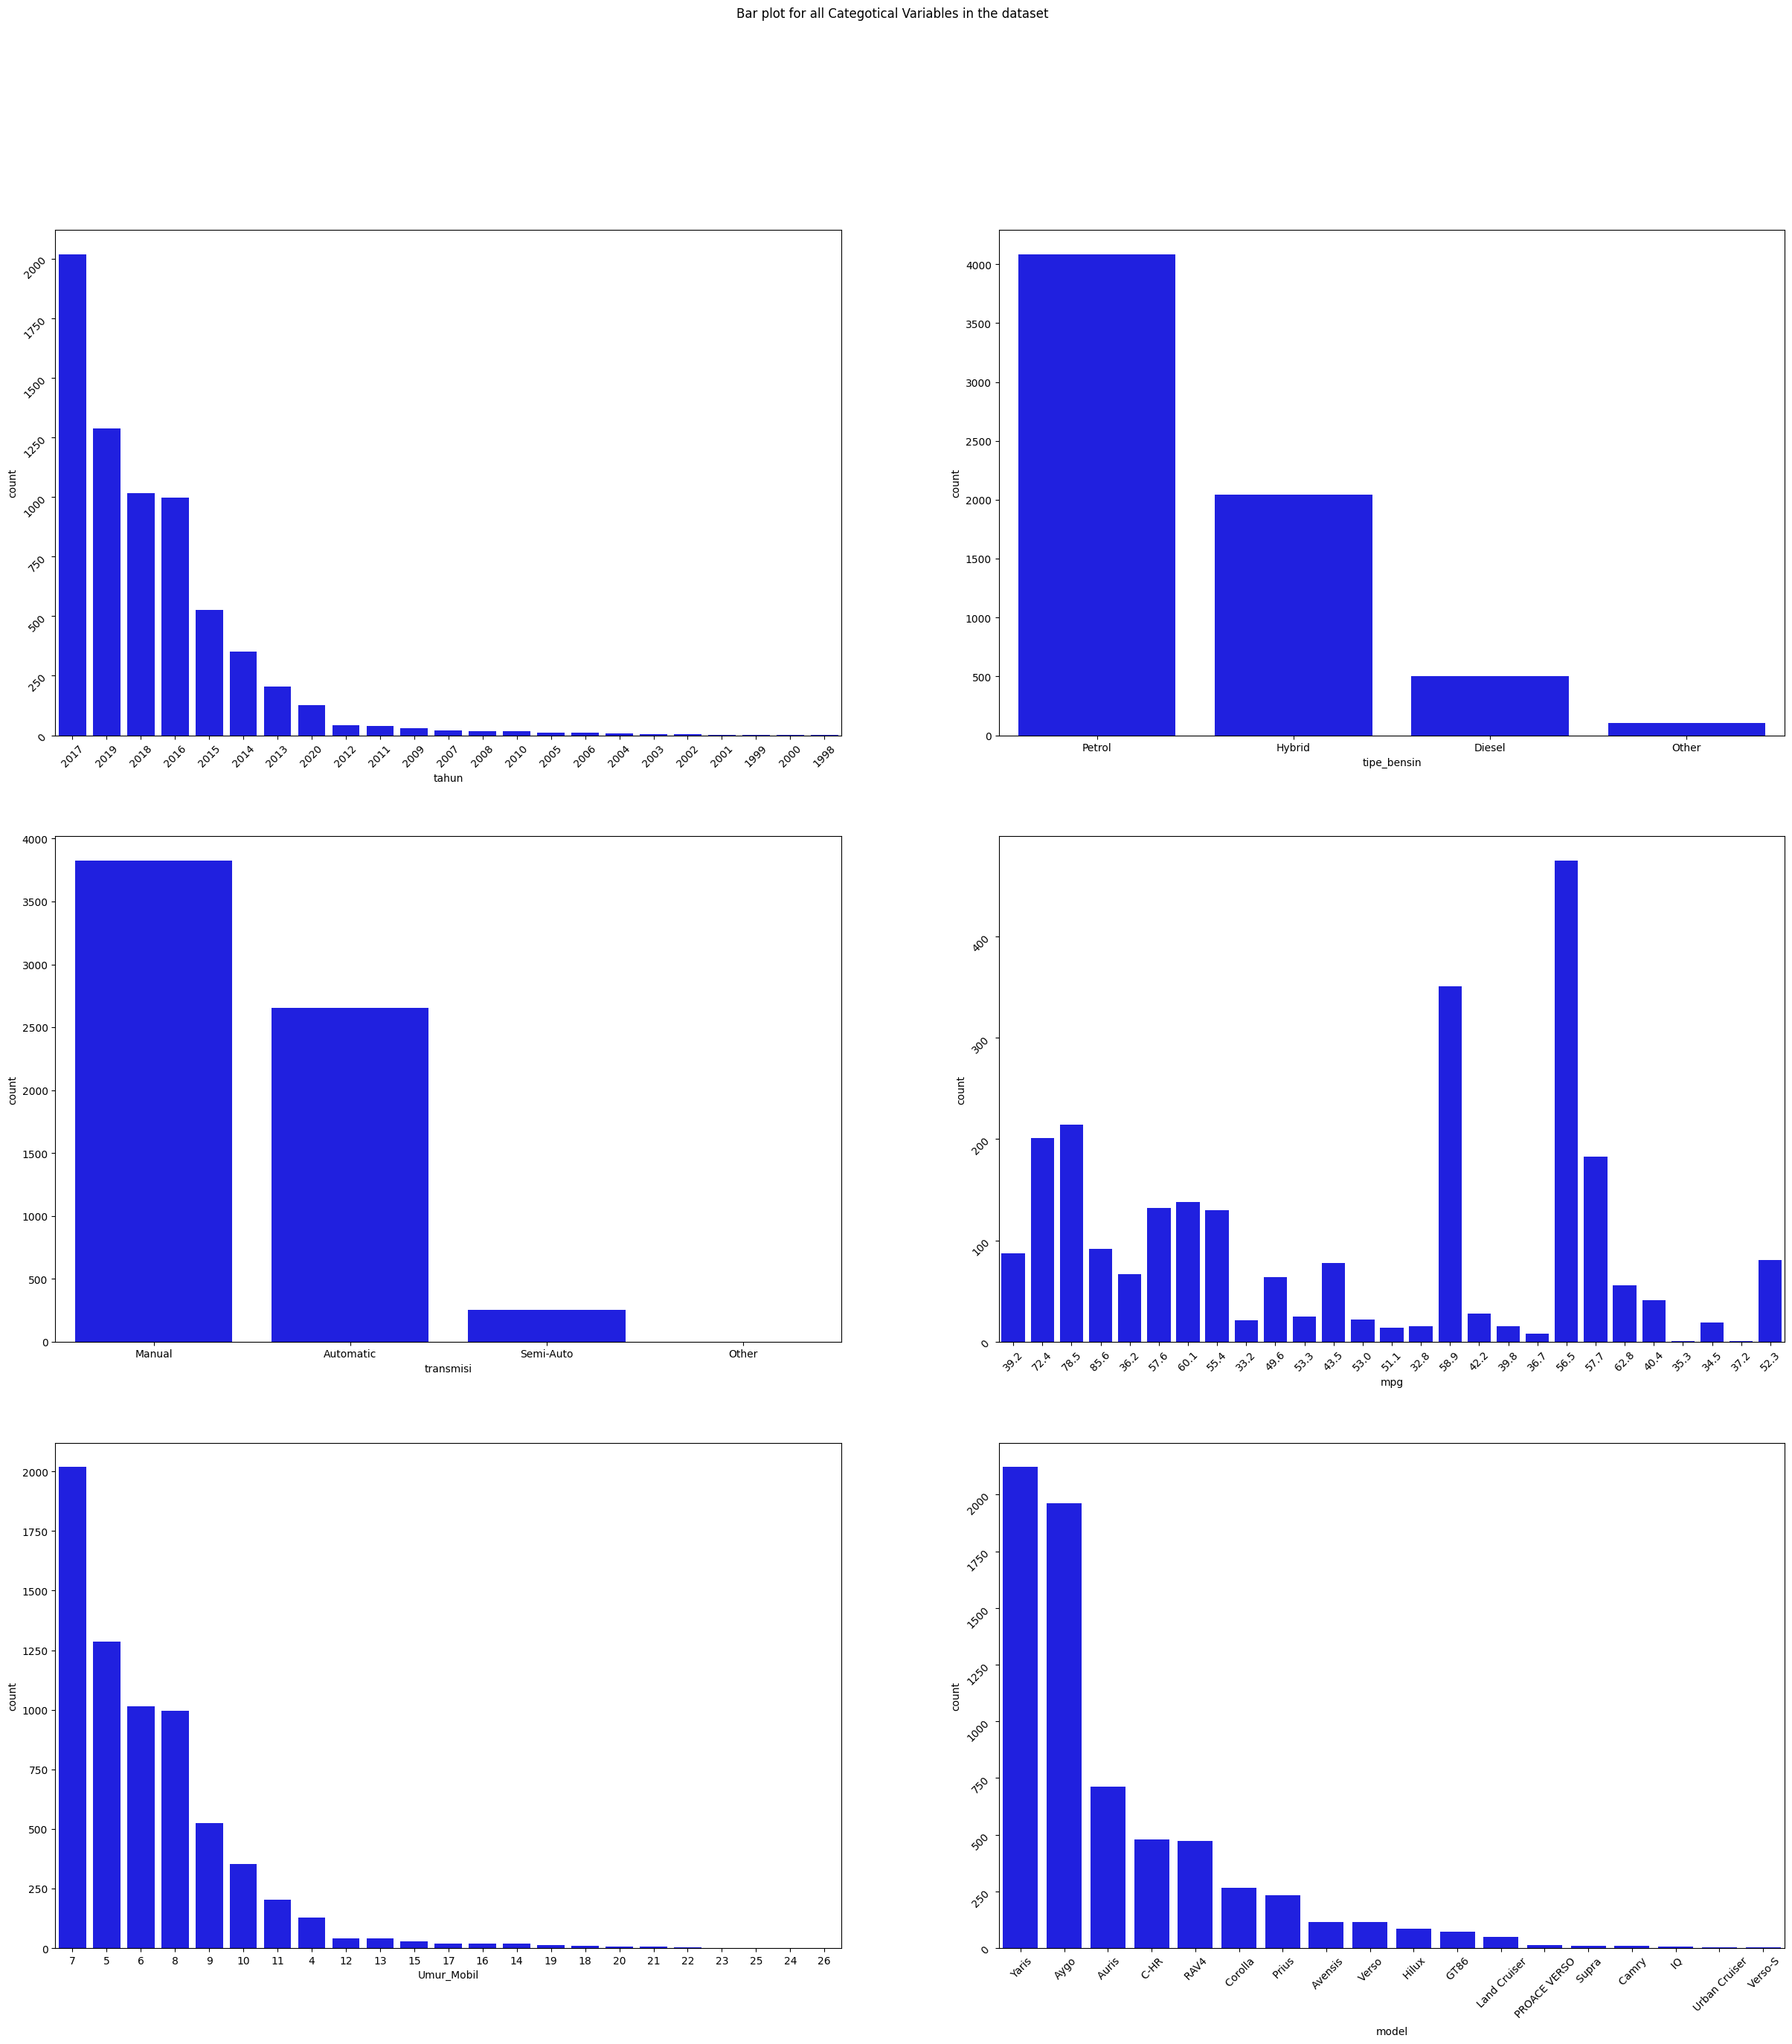

In [24]:
# Count Plot
fig, axes = plt.subplots(3,2, figsize = (30,30))
fig.suptitle('Bar plot for all Categotical Variables in the dataset')
sns.countplot(ax = axes[0,0], x = 'tahun', data = data, color = 'blue',
              order = data['tahun'].value_counts().index);
sns.countplot(ax = axes[0,1], x = 'tipe_bensin', data = data, color = 'blue',
              order = data['tipe_bensin'].value_counts().index);
sns.countplot(ax = axes[1,0], x = 'transmisi', data = data, color = 'blue',
              order = data['transmisi'].value_counts().index);
# diambil dari 500 tabel
# ini kalau dihapus yang head(500)
sns.countplot(ax = axes[1,1], x = 'mpg', data = data, color = 'blue',
              order = data['mpg'].head(500).value_counts().index); 
sns.countplot(ax = axes[2,0], x = 'Umur_Mobil', data = data, color = 'blue',
              order = data['Umur_Mobil'].value_counts().index);
sns.countplot(ax = axes[2,1], x = 'model', data = data, color = 'blue',
              order = data['model'].value_counts().index);
axes[0,0].tick_params(labelrotation=45);
axes[1,1].tick_params(labelrotation=45);
axes[2,1].tick_params(labelrotation=45);

# Ringkasan dari Count Plot Toyota

### - 59% Mobil memiliki bahan bakar bensin jenis Petrol, kemungkinan Bensin tersebut berasal dari Amerika Serikat dengan sebutan "Petrol"
### - Toyota Yaris Merupakan model mobil yang paling sering dirilis oleh Toyota
### - 55% Mobil memiliki transmisi Manual 
### - MPG (Mil Per galon) diambil dari 500 data, yang paling tinggi adalah 58,9

### 